2024-01-09 17:27:46.821 | INFO     | engine.vector_backtest_engine:vector_backtest:39 - {'result_dir': '/root/HappyQuantTest/happyquant/strategies/results', 'model_type': 'prediction_based', 'model_name': 'OLSLRModel', 'back_window': 2500, 'target_type': 'tag_raw', 'standardize_method': 'ts_z_score', 'single_test_method': 'ic', 'combine_method': 'pca', 'multi_test_method': 'StatsOLSLRModel', 'trade_type': 'long_short', 'model_id': 'OLSLRModel_20240108'}
2024-01-09 17:27:46.862 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2024-01-09 17:27:46.865 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.65

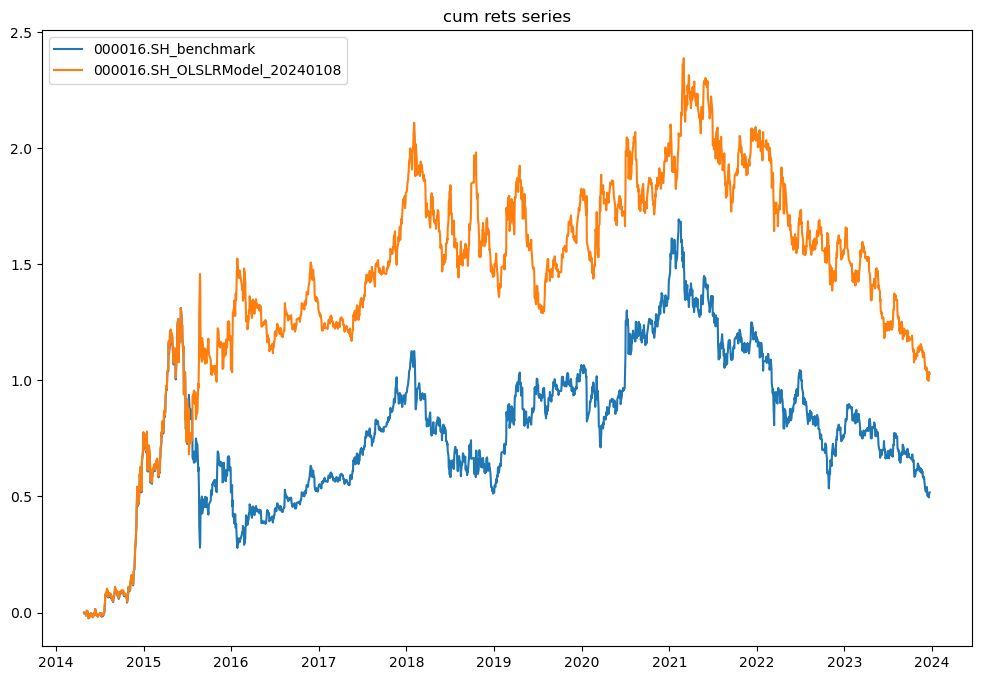

2024-01-09 17:28:32.497 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2024-01-09 17:28:32.499 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

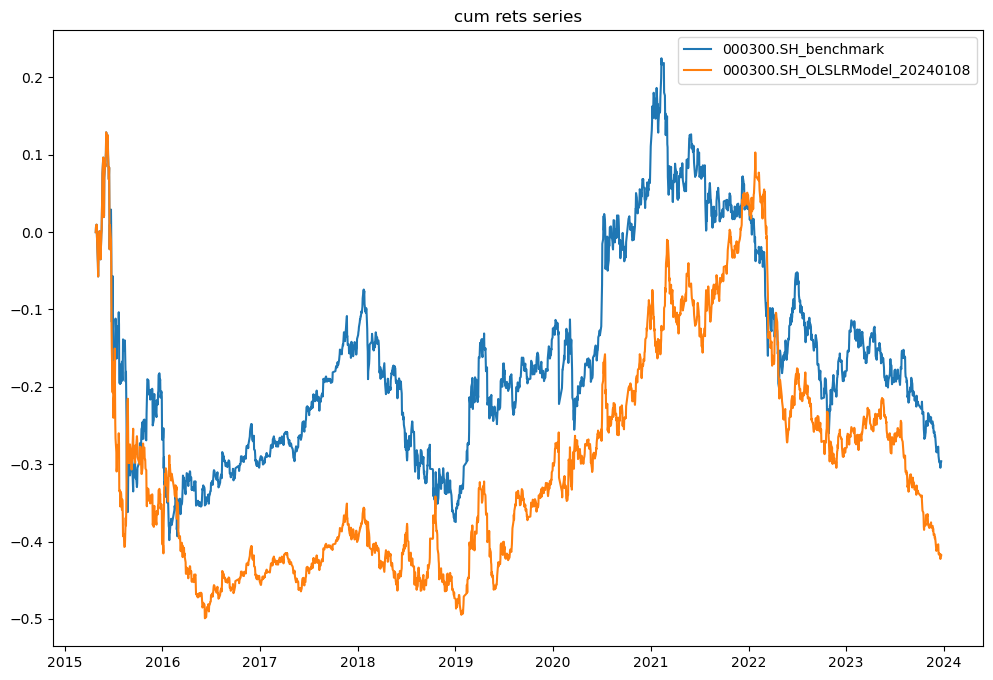

2024-01-09 17:29:06.597 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2024-01-09 17:29:06.598 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

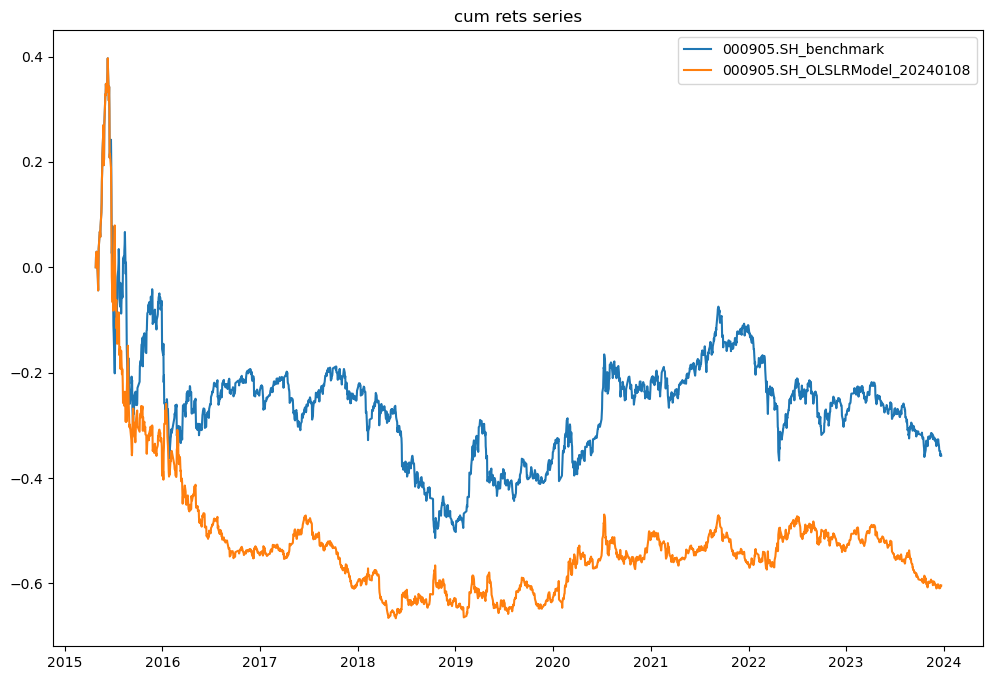

2024-01-09 17:29:32.718 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2024-01-09 17:29:32.719 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

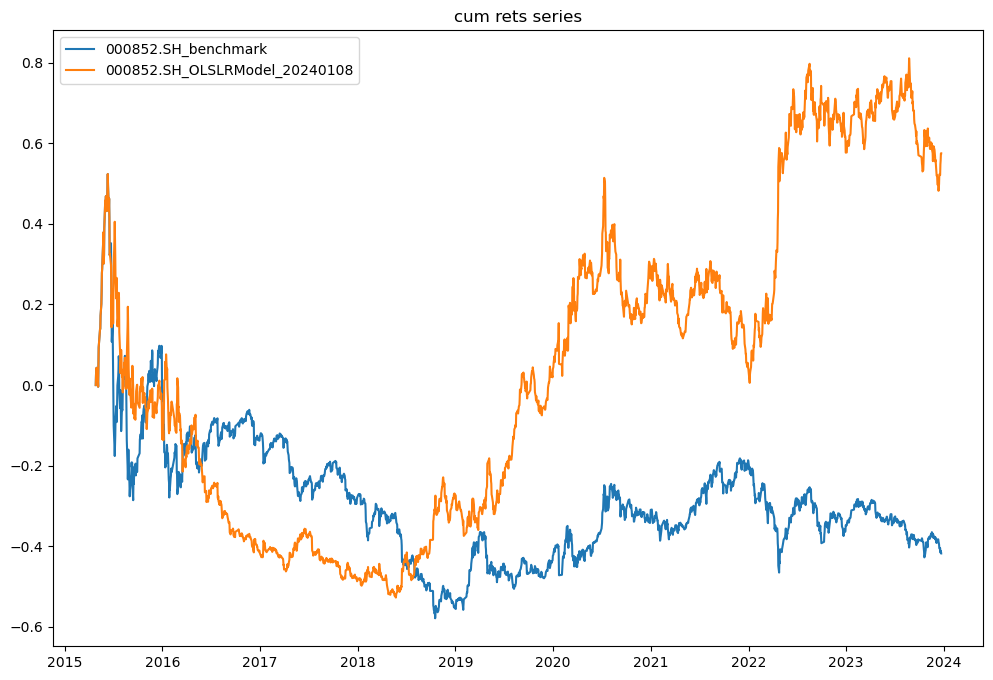

2024-01-09 17:30:03.749 | INFO     | engine.vector_backtest_engine:vector_backtest:101 -                                2015-04-27  2015-04-28  2015-04-29  2015-04-30  \
000016.SH_OLSLRModel_20240108         1.0         1.0         1.0         1.0   
000300.SH_OLSLRModel_20240108         1.0         1.0         1.0         1.0   
000905.SH_OLSLRModel_20240108         1.0         1.0         1.0         1.0   
000852.SH_OLSLRModel_20240108         1.0         1.0         1.0         1.0   

                               2015-05-04  
000016.SH_OLSLRModel_20240108         1.0  
000300.SH_OLSLRModel_20240108         1.0  
000905.SH_OLSLRModel_20240108         1.0  
000852.SH_OLSLRModel_20240108         1.0  
2024-01-09 17:30:03.776 | INFO     | engine.vector_backtest_engine:vector_backtest:106 -                                2015-04-27  2015-04-28  2015-04-29  2015-04-30  \
000016.SH_benchmark             -0.007896    0.000290   -0.009988    0.006619   
000016.SH_OLSLRModel_20240108   -0

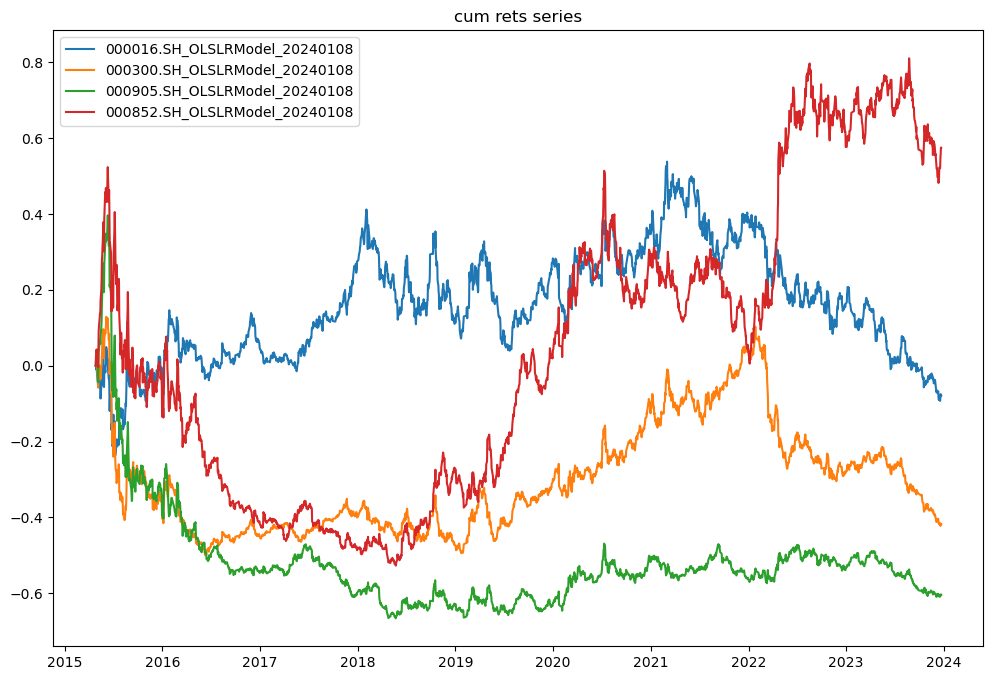

2024-01-09 17:30:04.109 | INFO     | engine.vector_backtest_engine:get_portfolio_pnl:134 -                    portfolio_benchmark  portfolio_equal_weight
annualized return            -0.023519               -0.005587
sharpe ratio                 -0.105244               -0.030101
win ratio                     0.515884                0.502608
win per loss                  0.920090                0.983619


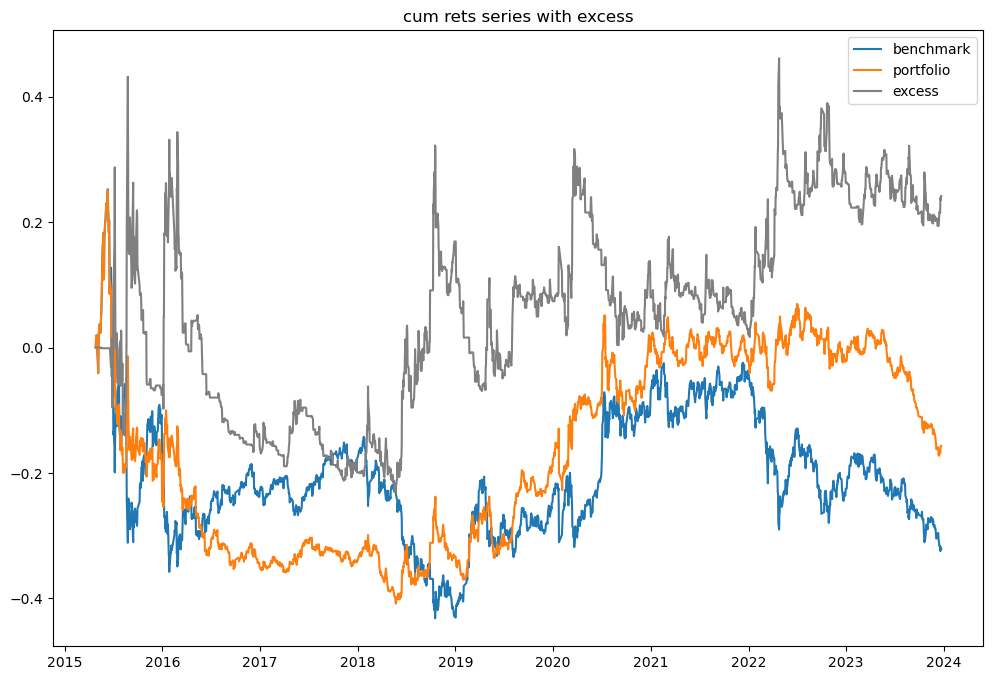

2024-01-09 17:30:04.412 | INFO     | engine.vector_backtest_engine:vector_backtest:39 - {'result_dir': '/root/HappyQuantTest/happyquant/strategies/results', 'model_type': 'prediction_based', 'model_name': 'LogisticModel', 'back_window': 2500, 'target_type': 'tag_class', 'standardize_method': 'ts_z_score', 'single_test_method': 'ic', 'combine_method': 'pca', 'multi_test_method': 'StatsOLSLRModel', 'trade_type': 'long_short', 'model_id': 'LogisticModel_20240108'}
2024-01-09 17:30:04.419 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2024-01-09 17:30:04.421 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801     

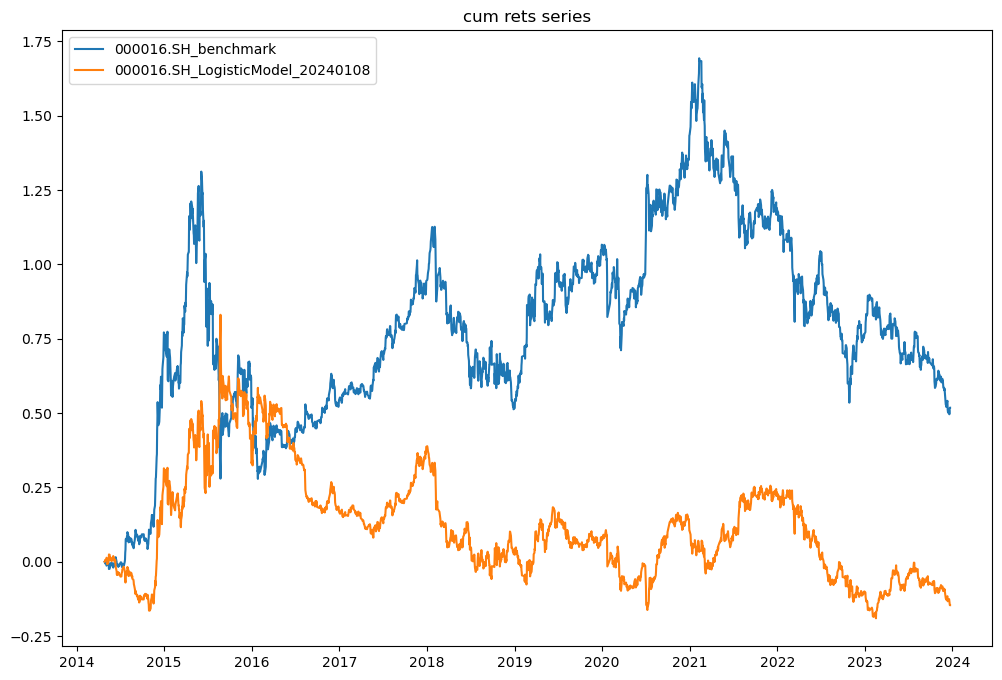

2024-01-09 17:30:43.804 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2024-01-09 17:30:43.806 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

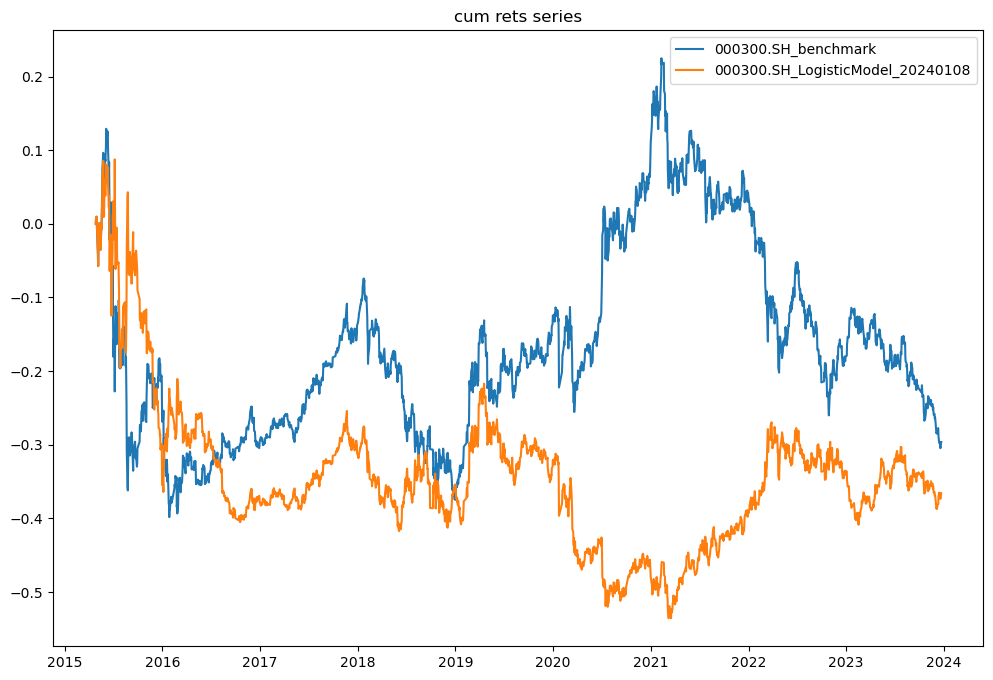

2024-01-09 17:31:15.408 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2024-01-09 17:31:15.409 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

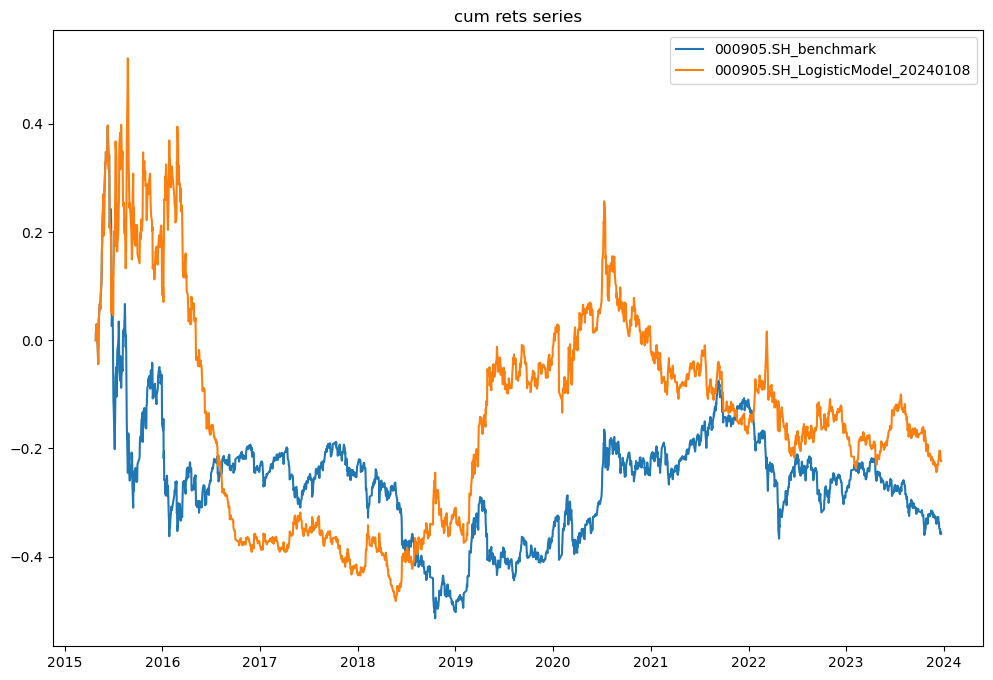

2024-01-09 17:31:47.541 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2024-01-09 17:31:47.543 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

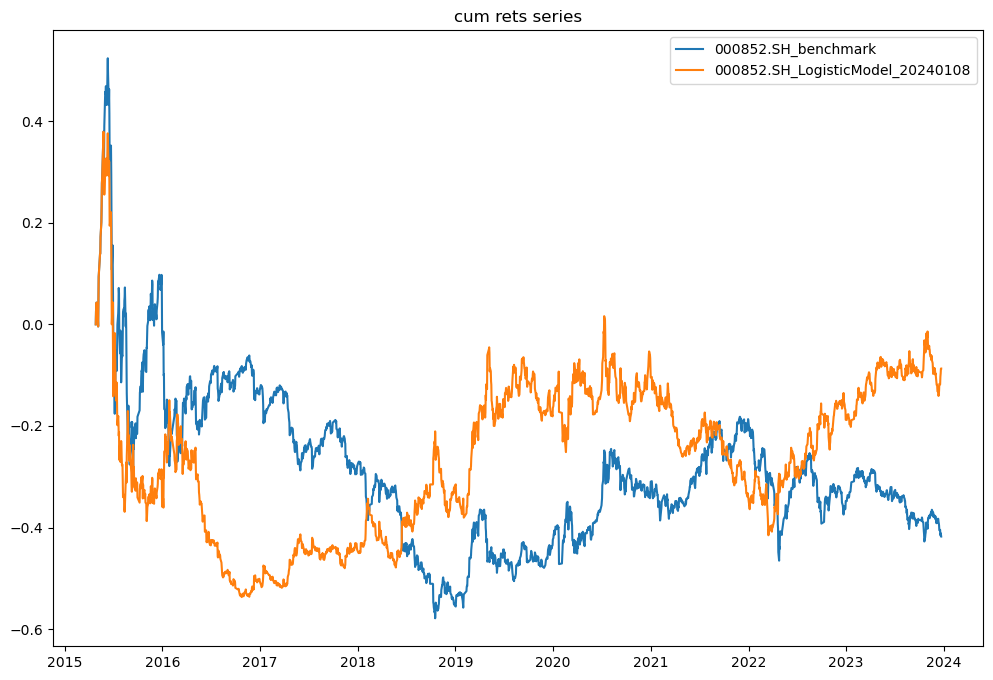

2024-01-09 17:32:18.051 | INFO     | engine.vector_backtest_engine:vector_backtest:101 -                                   2015-04-27  2015-04-28  2015-04-29  \
000016.SH_LogisticModel_20240108         1.0         1.0         1.0   
000300.SH_LogisticModel_20240108         1.0         1.0         1.0   
000905.SH_LogisticModel_20240108         1.0         1.0         1.0   
000852.SH_LogisticModel_20240108         1.0         1.0         1.0   

                                  2015-04-30  2015-05-04  
000016.SH_LogisticModel_20240108         1.0         1.0  
000300.SH_LogisticModel_20240108         1.0         1.0  
000905.SH_LogisticModel_20240108         1.0         1.0  
000852.SH_LogisticModel_20240108         1.0         1.0  
2024-01-09 17:32:18.078 | INFO     | engine.vector_backtest_engine:vector_backtest:106 -                                   2015-04-27  2015-04-28  2015-04-29  \
000016.SH_benchmark                -0.007896    0.000290   -0.009988   
000016.SH_LogisticMode

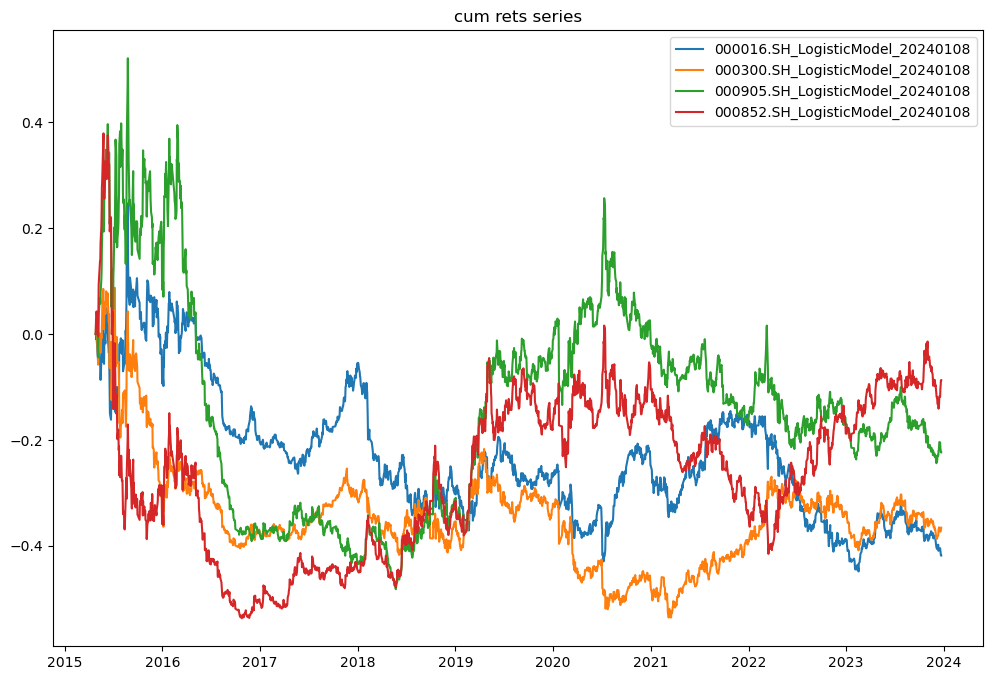

2024-01-09 17:32:18.376 | INFO     | engine.vector_backtest_engine:get_portfolio_pnl:134 -                    portfolio_benchmark  portfolio_equal_weight
annualized return            -0.023519               -0.012981
sharpe ratio                 -0.105244               -0.076281
win ratio                     0.515884                0.518729
win per loss                  0.920090                0.913077


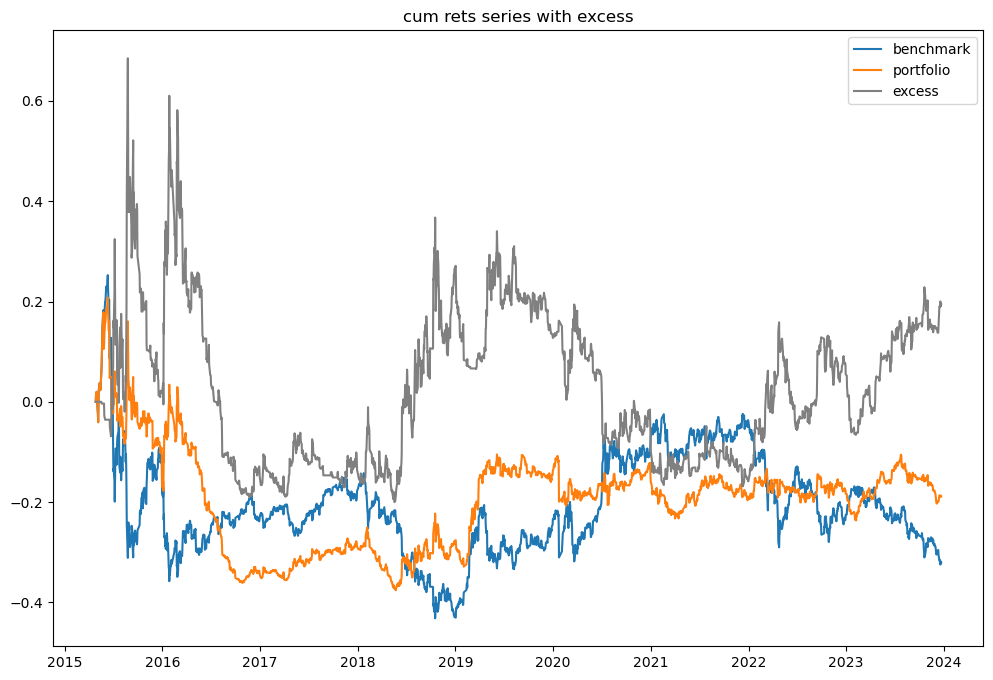

2024-01-09 17:32:18.617 | INFO     | engine.vector_backtest_engine:vector_backtest:39 - {'result_dir': '/root/HappyQuantTest/happyquant/strategies/results', 'model_type': 'prediction_based', 'model_name': 'DecisionTreeModel', 'back_window': 2500, 'target_type': 'tag_class', 'standardize_method': None, 'single_test_method': None, 'combine_method': None, 'multi_test_method': None, 'trade_type': 'long_short', 'model_id': 'DecisionTreeModel_20240109'}
2024-01-09 17:32:18.626 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2024-01-09 17:32:18.628 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105      20040106      20040107     20040108
close          1011.347      1060.801      1075.656     

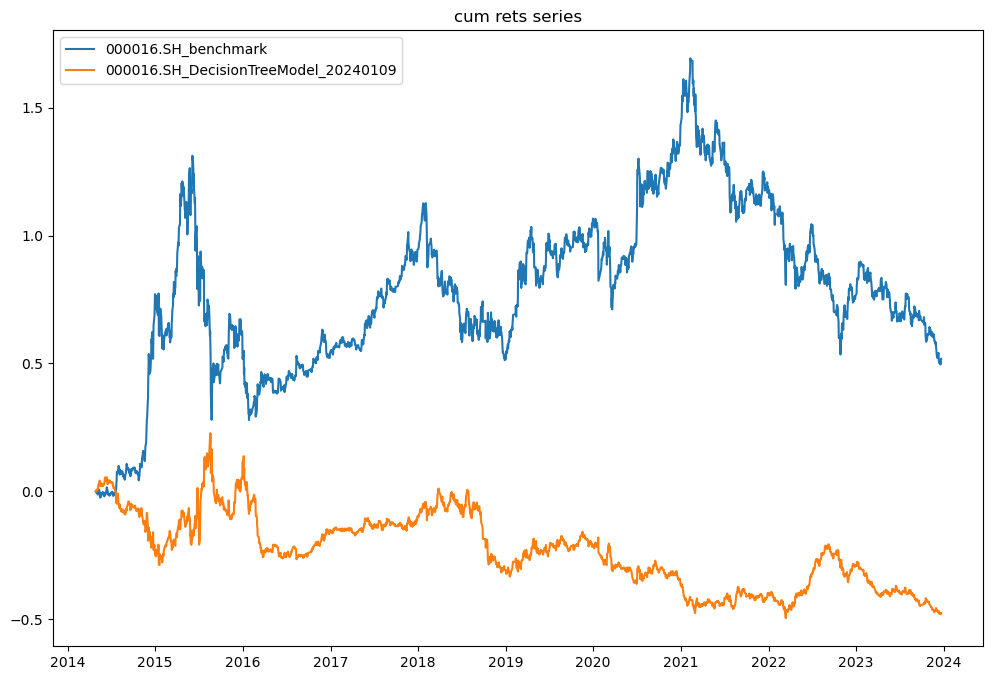

2024-01-09 17:33:24.341 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2024-01-09 17:33:24.342 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

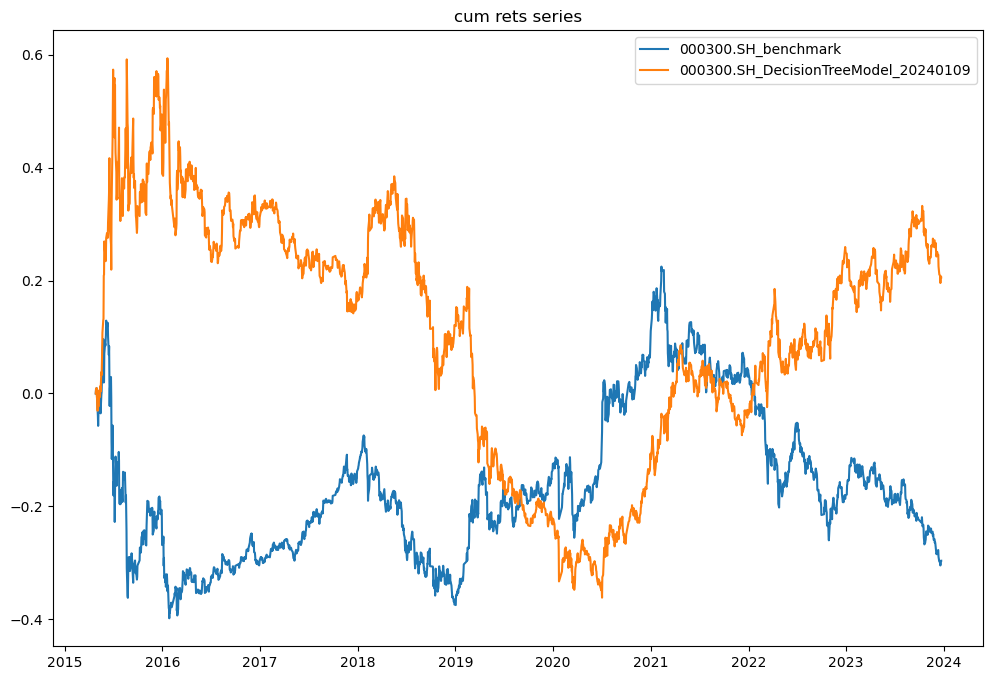

2024-01-09 17:34:22.836 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2024-01-09 17:34:22.838 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

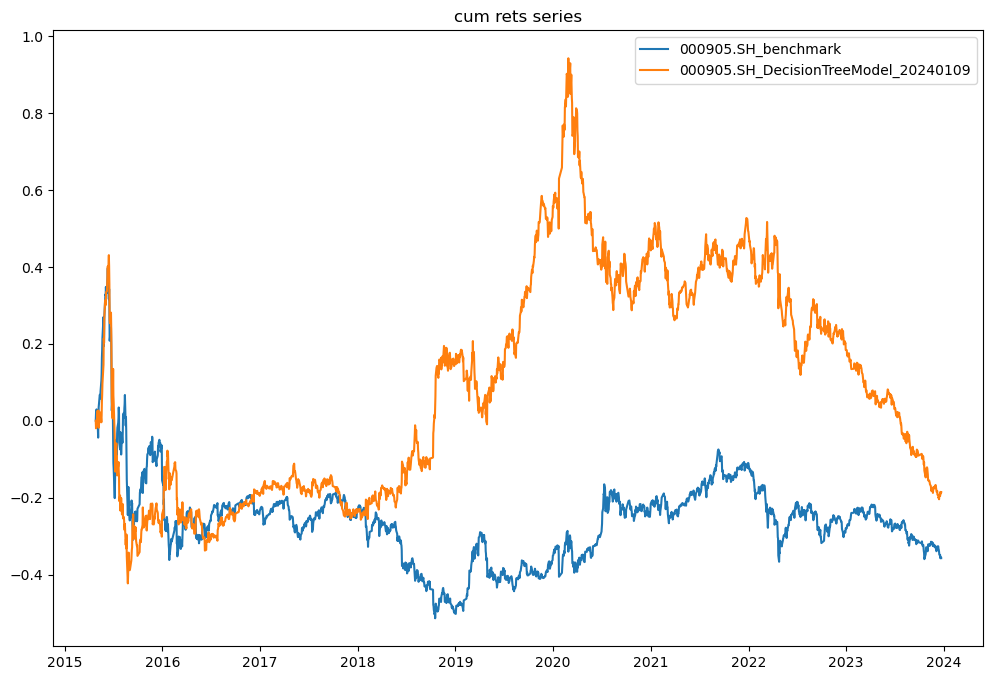

2024-01-09 17:35:19.044 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2024-01-09 17:35:19.046 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

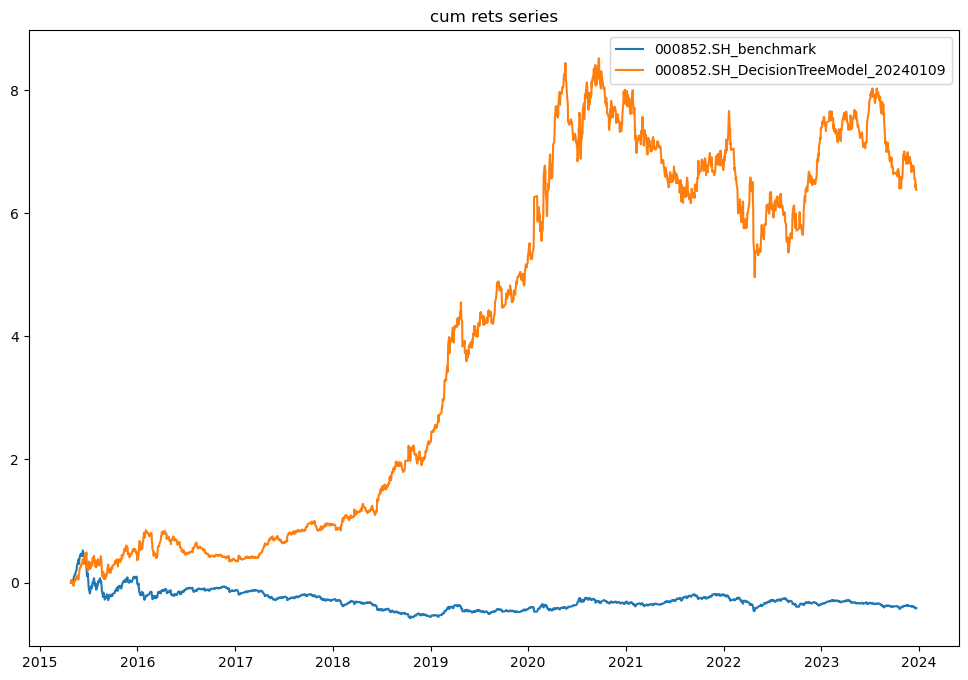

2024-01-09 17:36:08.048 | INFO     | engine.vector_backtest_engine:vector_backtest:101 -                                       2015-04-27  2015-04-28  2015-04-29  \
000016.SH_DecisionTreeModel_20240109         1.0         1.0         1.0   
000300.SH_DecisionTreeModel_20240109         1.0         1.0         1.0   
000905.SH_DecisionTreeModel_20240109        -1.0        -1.0         1.0   
000852.SH_DecisionTreeModel_20240109         1.0         1.0         1.0   

                                      2015-04-30  2015-05-04  
000016.SH_DecisionTreeModel_20240109         1.0         1.0  
000300.SH_DecisionTreeModel_20240109         1.0         1.0  
000905.SH_DecisionTreeModel_20240109         1.0        -1.0  
000852.SH_DecisionTreeModel_20240109         1.0         1.0  
2024-01-09 17:36:08.065 | INFO     | engine.vector_backtest_engine:vector_backtest:106 -                                       2015-04-27  2015-04-28  2015-04-29  \
000016.SH_benchmark                    -0.007896  

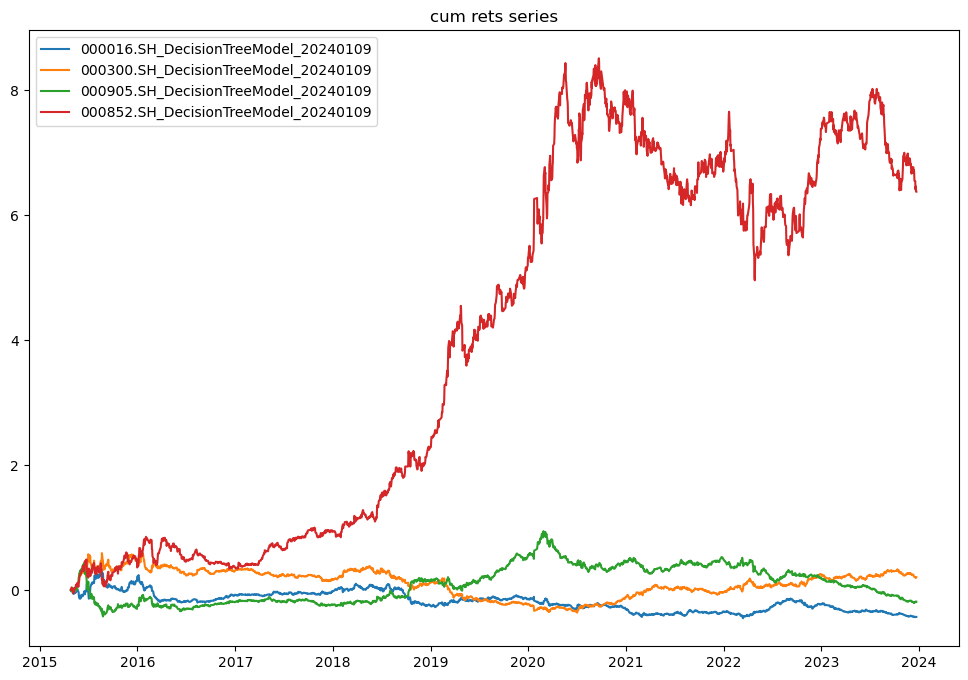

2024-01-09 17:36:08.334 | INFO     | engine.vector_backtest_engine:get_portfolio_pnl:134 -                    portfolio_benchmark  portfolio_equal_weight
annualized return            -0.023519                0.071129
sharpe ratio                 -0.105244                0.596974
win ratio                     0.515884                0.509246
win per loss                  0.920090                1.087676


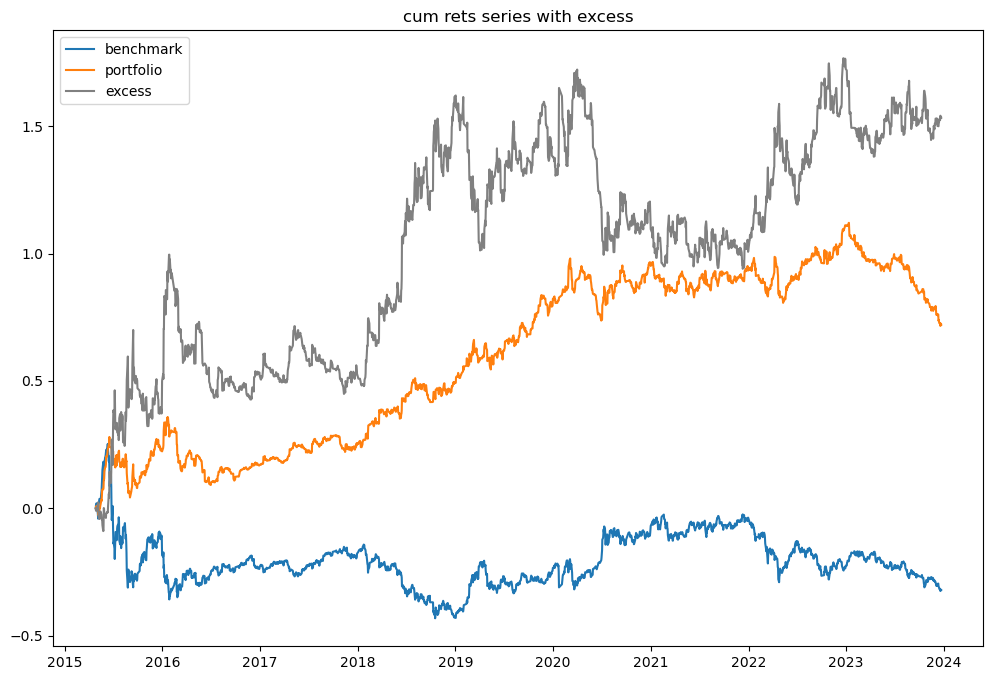

2024-01-09 17:36:08.601 | INFO     | engine.vector_backtest_engine:vector_backtest:39 - {'result_dir': '/root/HappyQuantTest/happyquant/strategies/results', 'model_type': 'rule_based', 'model_name': 'vote', 'back_window': 3000, 'target_type': 'tag_raw', 'standardize_method': 'ts_z_score', 'single_test_method': 'ic', 'combine_method': 'pca', 'multi_test_method': 'StatsOLSLRModel', 'trade_type': 'long_short', 'model_id': 'combo_vote_20240109', 'combo_model_id_list': ['OLSLRModel_20240108', 'LogisticModel_20240108', 'DecisionTreeModel_20240109']}
2024-01-09 17:36:08.612 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000016.parquet
2024-01-09 17:36:08.613 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0             1             2             3            4
ts_code       000016.SH     000016.SH     000016.SH     000016.SH    000016.SH
trade_date     20040102      20040105

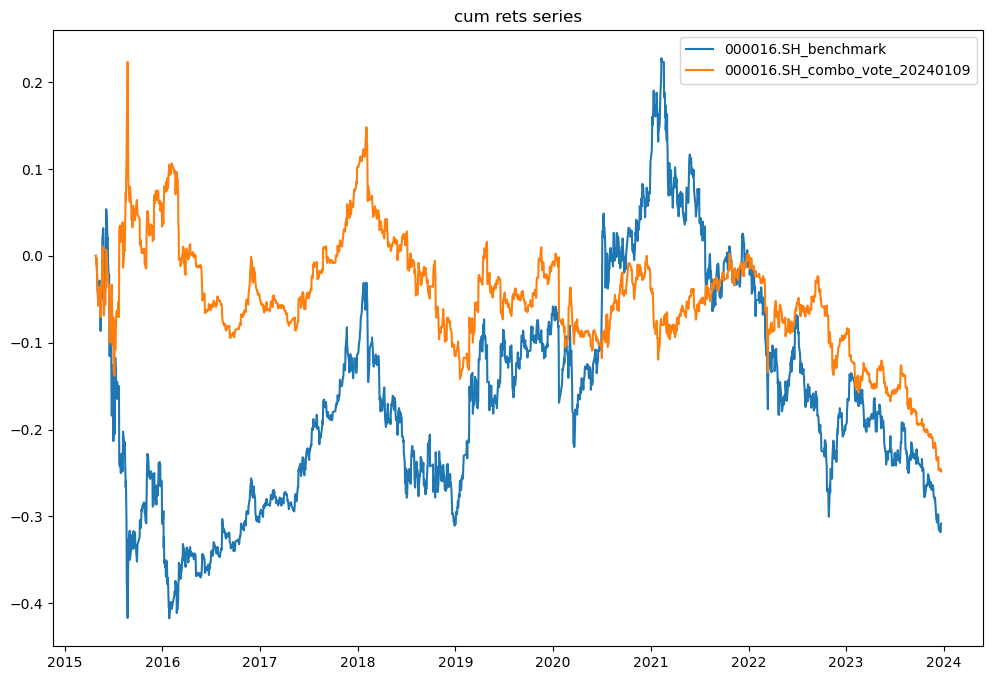

2024-01-09 17:36:08.937 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000300.parquet
2024-01-09 17:36:08.939 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1           2            3           4
ts_code       000300.SH    000300.SH   000300.SH    000300.SH   000300.SH
trade_date     20050104     20050105    20050106     20050107    20050110
close           982.794      992.564     983.174      983.958     993.879
open            994.769      981.577     993.331      983.045      983.76
high            994.769      997.323     993.788      995.711     993.959
low             980.658      979.877      980.33      979.812     979.789
pre_close        1000.0      982.794     992.564      983.174     983.958
change          -17.206         9.77       -9.39        0.784       9.921
pct_chg         -1.7206       0.9941      -0.946       0.0797      1.0083
vol  

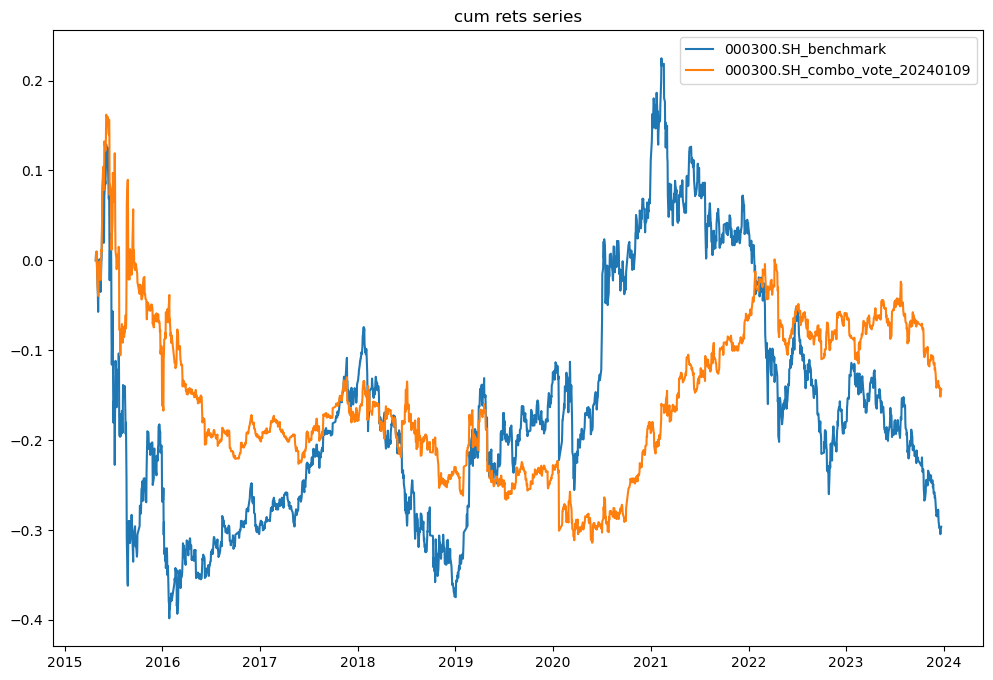

2024-01-09 17:36:09.341 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000905.parquet
2024-01-09 17:36:09.342 | INFO     | data_manager.data_loader:load_data_by_file:16 -                       0            1            2            3            4
ts_code       000905.SH    000905.SH    000905.SH    000905.SH    000905.SH
trade_date     20050104     20050105     20050106     20050107     20050110
close           986.927     1003.633      994.595      997.606     1006.337
open            996.682       986.57      1003.49      993.434      996.928
high            996.682     1008.855      1003.49       1009.0     1006.457
low             984.795      985.677      990.792      990.446      993.123
pre_close        1000.0      986.927     1003.633      994.595      997.606
change          -13.073       16.706       -9.038        3.011        8.731
pct_chg         -1.3073       1.6927      -0.9005       0.302

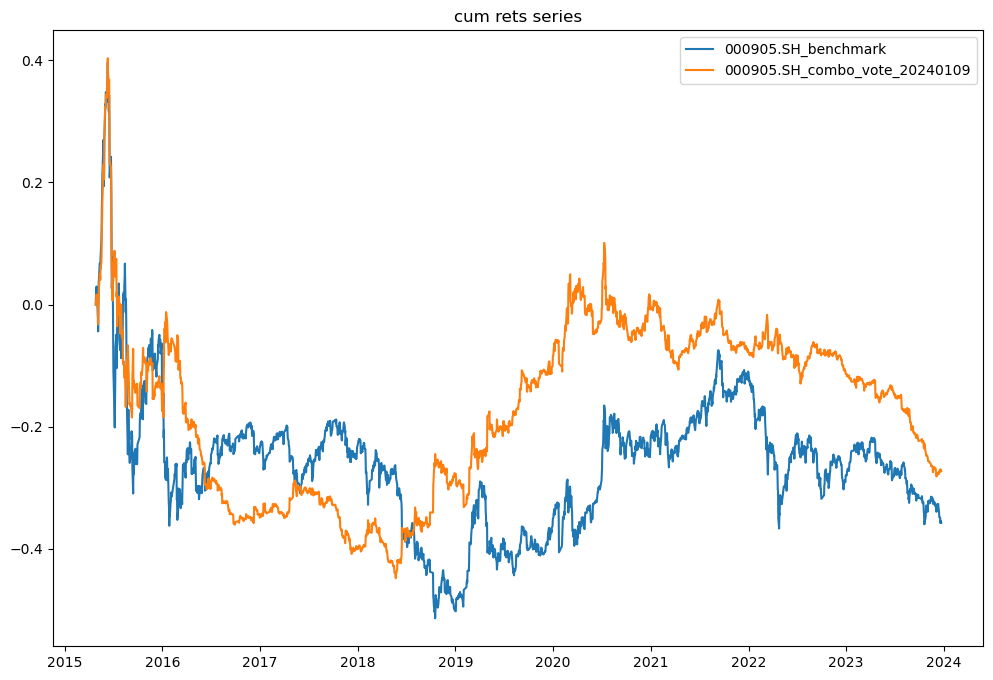

2024-01-09 17:36:09.648 | INFO     | data_manager.data_loader:load_data_by_file:15 - data loaded from /root/HappyQuantTest/happyquant/raw_data/stock_index/000852.parquet
2024-01-09 17:36:09.650 | INFO     | data_manager.data_loader:load_data_by_file:16 -                      0          1           2           3           4
ts_code      000852.SH  000852.SH   000852.SH   000852.SH   000852.SH
trade_date    20050104   20050105    20050106    20050107    20050110
close          989.984   1013.583    1005.465     1011.74    1023.638
open           996.278    989.873    1014.965    1005.515    1011.925
high           996.278   1018.261    1014.965    1021.706    1023.638
low            982.988    988.568    1001.213    1001.096    1007.802
pre_close       1000.0    989.984    1013.583    1005.465     1011.74
change         -10.016     23.599      -8.118       6.275      11.898
pct_chg        -1.0016     2.3838     -0.8009      0.6241       1.176
vol          494737.55  822661.44   732454.01

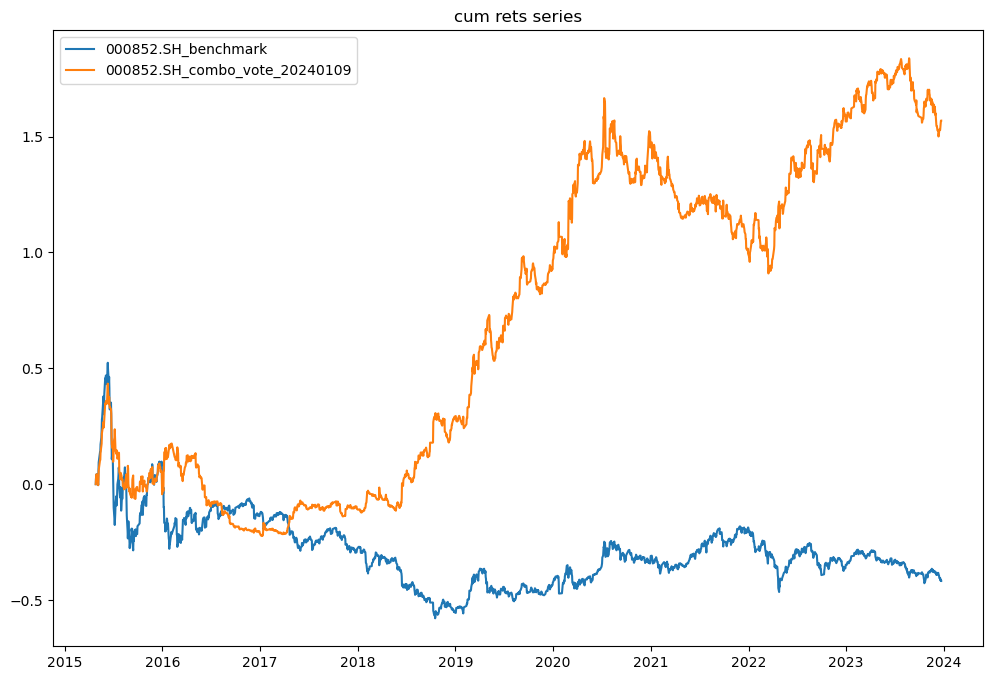

2024-01-09 17:36:09.982 | INFO     | engine.vector_backtest_engine:vector_backtest:101 -                                2015-04-27  2015-04-28  2015-04-29  2015-04-30  \
000016.SH_combo_vote_20240109    1.000000    1.000000         1.0         1.0   
000300.SH_combo_vote_20240109    1.000000    1.000000         1.0         1.0   
000905.SH_combo_vote_20240109    0.333333    0.333333         1.0         1.0   
000852.SH_combo_vote_20240109    1.000000    1.000000         1.0         1.0   

                               2015-05-04  
000016.SH_combo_vote_20240109    1.000000  
000300.SH_combo_vote_20240109    1.000000  
000905.SH_combo_vote_20240109    0.333333  
000852.SH_combo_vote_20240109    1.000000  
2024-01-09 17:36:09.992 | INFO     | engine.vector_backtest_engine:vector_backtest:106 -                                2015-04-27  2015-04-28  2015-04-29  2015-04-30  \
000016.SH_benchmark             -0.007896    0.000290   -0.009988    0.006619   
000016.SH_combo_vote_20240109   -0

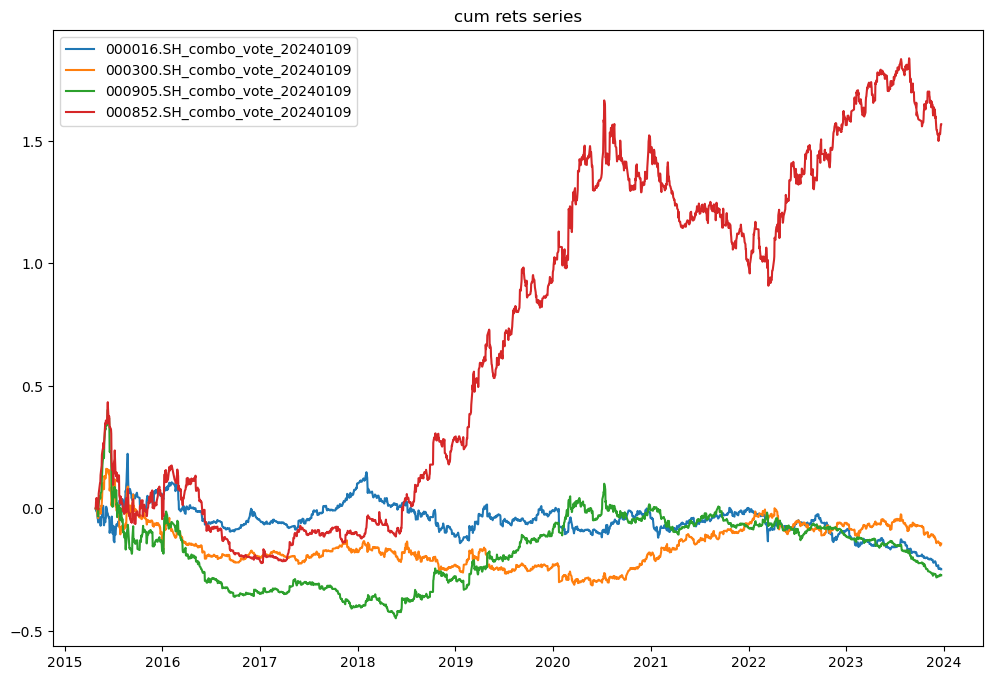

2024-01-09 17:36:10.354 | INFO     | engine.vector_backtest_engine:get_portfolio_pnl:134 -                    portfolio_benchmark  portfolio_equal_weight
annualized return            -0.023519                0.017520
sharpe ratio                 -0.105244                0.149290
win ratio                     0.515884                0.518255
win per loss                  0.920090                0.960742


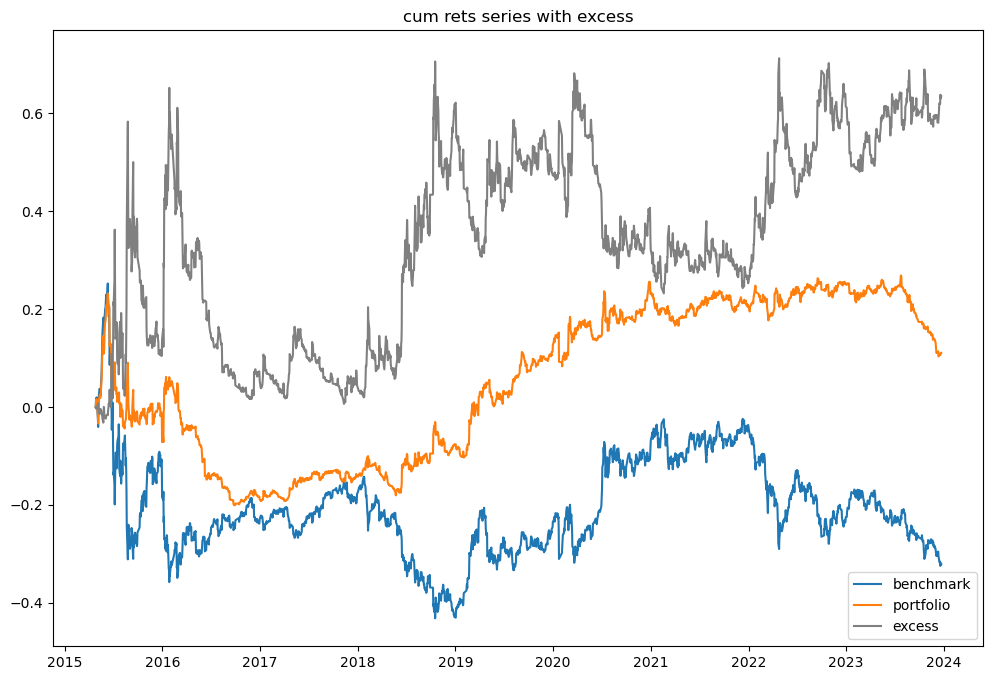

In [1]:
from strategies.StockIndexStrategy import StockIndexStrategy
params_list = [
    {'model_id': 'OLSLRModel_20240108', 'back_window': 2500},
    {'model_name': 'LogisticModel', 'model_id': 'LogisticModel_20240108', 'back_window': 2500, 'target_type': 'tag_class'},
    {
        'model_name': 'DecisionTreeModel', 'model_id': 'DecisionTreeModel_20240109', 'back_window': 2500, 'target_type': 'tag_class',
        'standardize_method': None, 'single_test_method': None, 'combine_method': None, 'multi_test_method': None,
    },
    {
        'model_type': 'rule_based', 'model_name': 'vote', 'model_id': 'combo_vote_20240109', 
        'combo_model_id_list': ['OLSLRModel_20240108', 'LogisticModel_20240108', 'DecisionTreeModel_20240109'],
    },
    #{
    #    'model_name': 'LogisticModel', 'model_id': 'combo_LogisticModel_20240109', 
    #    'combo_model_id_list': ['OLSLRModel_20240108', 'LogisticModel_20240108', 'DecisionTreeModel_20240109'], 'back_window': 500, 'target_type': 'tag_class', 
    #    'standardize_method': None, 'single_test_method': None, 'combine_method': None, 'multi_test_method': None,
    #}
]
factor_names = ['TrendFollowing', 'TrendReverse']
contracts = ['000016.SH', '000300.SH', '000905.SH', '000852.SH']

for new_param in params_list:
    mystrategy = StockIndexStrategy()
    mystrategy.set_params(**new_param)
    mystrategy.run_backtest(factor_names, contracts)
    mystrategy.portfolio_backtest(new_param['model_id'], leverage=1.0)